# Text Classification: Name Gender

Here is a partition of the name gender data into training, dev-test, and test data as shown in the lectures:

In [1]:
import nltk
nltk.download('names')
from nltk.corpus import names
m = names.words('male.txt')
f = names.words('female.txt')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\K\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


In [2]:
import random
random.seed(1234) # Set the random seed to allow replicability
names = ([(name, 'male') for name in m] +
         [(name, 'female') for name in f])
random.shuffle(names)
train_names = names[1000:]
devtest_names = names[500:1000]
test_names = names[:500]

And here is one of the classifiers given in the lectures.

In [3]:
def gender_features2(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}
train_set2 = [(gender_features2(n), g) for n, g in train_names]
devtest_set2 = [(gender_features2(n), g) for n, g in devtest_names]
classifier2 = nltk.NaiveBayesClassifier.train(train_set2)
nltk.classify.accuracy(classifier2, devtest_set2)

0.77

### Exercise: Using more information
Define a new function `gender_features5` that takes, as features, any suffixes of size 1, 2, 3, 4, and 5. Examine the accuracy results. What can you conclude from this new classifier?

In [4]:
def gender_features5(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:],
            'suffix3': word[-3:],
            'suffix4': word[-4:],
            'suffix5': word[-5:]}
train_set5 = [(gender_features5(n),g) for n, g in train_names]
devtest_set5 = [(gender_features5(n),g) for n, g in devtest_names]
classifier5 = nltk.NaiveBayesClassifier.train(train_set5)
print(nltk.classify.accuracy(classifier5, devtest_set5))

0.802


### Exercise: Plot the impact of the training size on our classifier

The following code plots the classifier accuracy on the training and dev-test set as we increase the training size on the classifier we used in the. Examine the plot and answer the following questions:

1. From what amount of training data you would judge that the system stops over-fitting?
2. From what amount of training data would you say that there is no need to add more training data?

In [5]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = nltk.NaiveBayesClassifier.train(train_set2[:n])
    train_accuracy2.append(nltk.classify.accuracy(classifier2, train_set2[:n]))
    devtest_accuracy2.append(nltk.classify.accuracy(classifier2, devtest_set2))

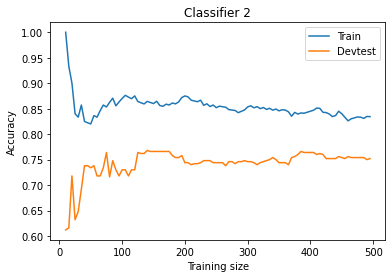

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

### Exercise: Plot the impact of the training size on your classifier

Make the same plot, this time using the classifier that uses the feature extractor that you have designed. Compare your plot against the one in the above exercise.

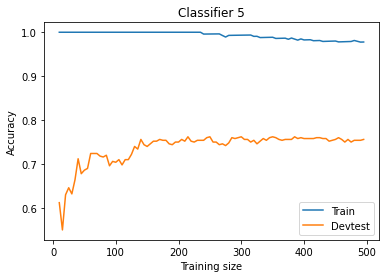

In [7]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10,500,5)
for n in nsamples:
    classifier5 = nltk.NaiveBayesClassifier.train(train_set5[:n])
    train_accuracy5.append(nltk.classify.accuracy(classifier5,train_set5[:n]))
    devtest_accuracy5.append(nltk.classify.accuracy(classifier5, devtest_set5))

%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 5')
plt.legend()

### Exercise: Repeat the analysis using sk-learn

The lectures show how to use sklearn to implement the name classifier. Replicate the work in this workshop and try to answer the same questions as above.

1. Is it better to use the last two characters, or the last 5 characters?
2. From what amount of training data you would judge that the system stops overfitting?
3. From what amount of training data would you say that there is no need to add more training data?


In [8]:
def one_hot_character(c):
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    result = [0]*(len(alphabet)+1)
    i = alphabet.find(c.lower())
    if i >= 0:
        result[i] = 1
    else:
        result[len(alphabet)] = 1 #character is out of the aplphabet
    return result

    
def sk_gender_features2(word):
    "return the one hot encoding of the last two characters"
    assert len(word) >=2
    last = one_hot_character(word[-1])
    secondlast = one_hot_character(word[-2])
    return secondlast + last


In [9]:
def sk_gender_features5(word):
    "return the one hot encding of the last 5 characters"
    features = []
    for i in range(5):
        if i <= len(word):
            features += one_hot_character(word[-i])
        else:
            features += one_hot_character(' ')
    return features

Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

sk_train_set2 = [(sk_gender_features2(n), g) for n, g in train_names]
sk_devtest_set2 = [(sk_gender_features2(n), g) for n, g in devtest_names]
sk_classifier2 = DecisionTreeClassifier()
train2_X, train2_y = zip(*sk_train_set2)
sk_classifier2.fit(train2_X,train2_y)
devtest2_X, devtest2_y =zip(*sk_devtest_set2)
devtest_predictions = sk_classifier2.predict(devtest2_X)
print(accuracy_score(devtest2_y,devtest_predictions))

0.782


In [11]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = DecisionTreeClassifier()
    classifier2.fit(train2_X[:n], train2_y[:n])
    train_predictions = classifier2.predict(train2_X[:n])
    train_accuracy2.append(accuracy_score(train2_y[:n], train_predictions))
    devtest_predictions = classifier2.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))

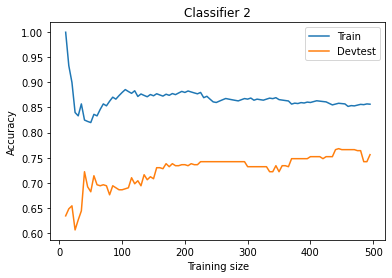

In [12]:
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

In [13]:
sk_train_set5 = [(sk_gender_features5(n), g) for n, g in train_names]
sk_devtest_set5 = [(sk_gender_features5(n), g) for n, g in devtest_names]
sk_classifier5 = DecisionTreeClassifier()
train5_X, train5_y = zip(*sk_train_set5)
sk_classifier5.fit(train5_X,train5_y)
devtest5_X, devtest5_y =zip(*sk_devtest_set5)
devtest_predictions = sk_classifier5.predict(devtest5_X)
print(accuracy_score(devtest5_y,devtest_predictions))

0.772


In [14]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier5 = DecisionTreeClassifier()
    classifier5.fit(train5_X[:n], train5_y[:n])
    train_predictions = classifier5.predict(train5_X[:n])
    train_accuracy5.append(accuracy_score(train5_y[:n], train_predictions))
    devtest_predictions = classifier5.predict(devtest5_X)
    devtest_accuracy5.append(accuracy_score(devtest5_y, devtest_predictions))

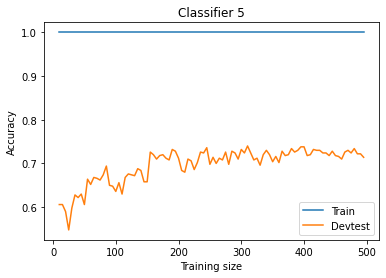

In [15]:
plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 5')
plt.legend()

MultinomialNB

In [16]:
from sklearn.naive_bayes import MultinomialNB
sk_train_set2 = [(sk_gender_features2(n), g) for n, g in train_names]
sk_devtest_set2 = [(sk_gender_features2(n), g) for n, g in devtest_names]
sk_classifier2 = MultinomialNB()
train2_X, train2_y = zip(*sk_train_set2)
sk_classifier2.fit(train2_X,train2_y)
devtest2_X, devtest2_y =zip(*sk_devtest_set2)
devtest_predictions = sk_classifier2.predict(devtest2_X)
print(accuracy_score(devtest2_y,devtest_predictions))

0.752


In [17]:
sk_train_set5 = [(sk_gender_features5(n), g) for n, g in train_names]
sk_devtest_set5 = [(sk_gender_features5(n), g) for n, g in devtest_names]
sk_classifier5 = MultinomialNB()
train5_X, train5_y = zip(*sk_train_set5)
sk_classifier5.fit(train5_X,train5_y)
devtest5_X, devtest5_y =zip(*sk_devtest_set5)
devtest_predictions = sk_classifier5.predict(devtest5_X)
print(accuracy_score(devtest5_y,devtest_predictions))

0.786


In [18]:
train_accuracy2 = []
devtest_accuracy2 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier2 = MultinomialNB()
    classifier2.fit(train2_X[:n], train2_y[:n])
    train_predictions = classifier2.predict(train2_X[:n])
    train_accuracy2.append(accuracy_score(train2_y[:n], train_predictions))
    devtest_predictions = classifier2.predict(devtest2_X)
    devtest_accuracy2.append(accuracy_score(devtest2_y, devtest_predictions))

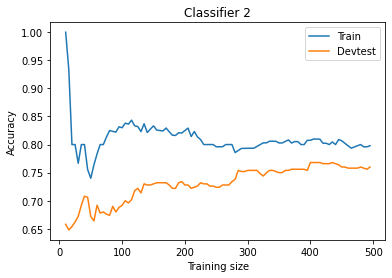

In [19]:
plt.plot(nsamples, train_accuracy2, label='Train')
plt.plot(nsamples, devtest_accuracy2, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 2')
plt.legend()

In [22]:
train_accuracy5 = []
devtest_accuracy5 = []
nsamples = range(10, 500, 5)
for n in nsamples:
    classifier5 = MultinomialNB()
    classifier5.fit(train5_X[:n], train5_y[:n])
    train_predictions = classifier5.predict(train5_X[:n])
    train_accuracy5.append(accuracy_score(train5_y[:n], train_predictions))
    devtest_predictions = classifier5.predict(devtest5_X)
    devtest_accuracy5.append(accuracy_score(devtest5_y, devtest_predictions))

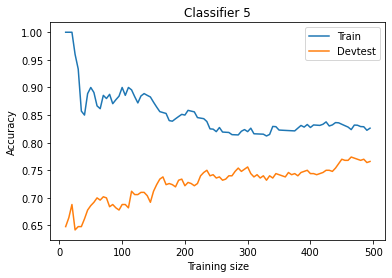

In [23]:
plt.plot(nsamples, train_accuracy5, label='Train')
plt.plot(nsamples, devtest_accuracy5, label='Devtest')
plt.xlabel('Training size')
plt.ylabel('Accuracy')
plt.title('Classifier 5')
plt.legend()